In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd


# Fluxograma de processos do algoritmo

![SNOWFALL](fluxograma.png)

# Definição da simulação

In [27]:
class simulacao_numerica:
    def __init__(
        self,
        rho,
        nu,
        epsilon_c,
        epsilon_d,
        epsilon_g,
        epsilon_e,
        delta_z,
        Dc,
        Lc,
        Dd,
        Ld,
        Dg,
        Lg,
        De,
        Le,
    ) -> None:

        # criando variaveis globais 


        # extraindo pontos dos gráficos

        D2_seed = np.array(
            ([0, 385], [1000, 380], [2000, 360], [3000, 325], [4000, 250], [4500,200])
        )

        D3_seed = np.array(
            ([0, 345], [1000, 340], [2000, 325], [3000, 290], [4000, 210], [4200, 180])
        )

        D4_seed = np.array(
            ([0, 305], [1000, 300], [2000, 280], [3000, 240], [3600, 200], [4000, 160])
        )

        # cirando dicionário para a iteração

        seed_dict = {
            "D2": D2_seed,
            "D3": D3_seed,
            "D4": D4_seed,
        }

        # cirando dicionários para as equacoes de cada curva

        equacao_dict = {}

        # inicializando o plot das curvas de carga

        fig = plt.figure(figsize=[16, 9])
        fig.suptitle("Curvas de desempenho", fontsize=16)

        ax = fig.add_subplot(1, 1, 1)

        for key in seed_dict:

            # recuperando semente

            seed = seed_dict[key]


            # interpolando equação 
                
            equacao = interp1d(
                seed[:, 0],
                seed[:, 1],
                kind='quadratic'
            )

            # calculando alfa

            alfa = equacao(0)

            # determinando beta médio

            beta = [(alfa - equacao(ponto)) / ponto**2 for ponto in seed[1:]]

            beta = np.mean(beta)


            # colocando equação e parâmetros no dicionário

            equacao_dict[key] = {
                'equacao': equacao,
                'alfa': alfa,
                'beta': beta,
            }

            # criando intervalo para plotagem

            intervalo = np.linspace(
                min(seed[:, 0]),
                max(seed[:, 0]),
                num=200
            )

            # usando a equação para calcular a curva

            curva = equacao(intervalo)

            # Plotando curva interpolada

            ax.plot(
                intervalo,
                curva,
                '-',
                label=key
            )

            # plotando pontos retirados do gráfico

            ax.scatter(
                seed[:, 0],
                seed[:, 1],
                color='k', )


        ax.locator_params(axis='y', nbins=30)
        ax.locator_params(axis='x', nbins=30)
        ax.set_ylabel('$H (ft)$', fontsize=16)
        ax.set_xlabel('$Q (m)$', fontsize=16)
        ax.grid()
        ax.legend()

        plt.savefig("figuras/curvas_de_desempenho.png")
        # plt.show()

# Declaração de variáveis

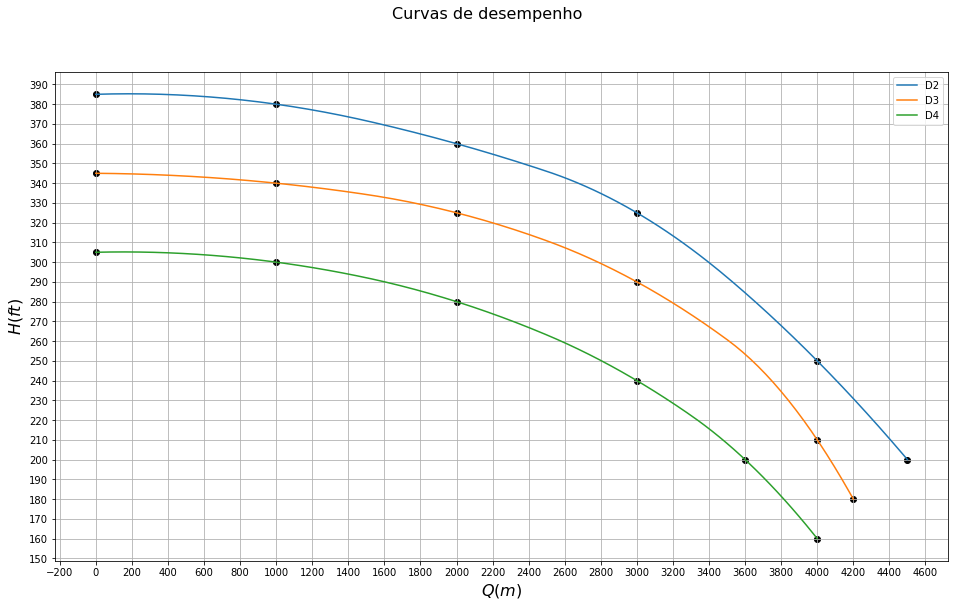

In [31]:
delta_z = 5
Dc = 3
Lc = 3
Dd = 3
Ld = 7
Dg = 3
Lg = 4

simulacao_numerica(1,2,1,1,1,1,1,1,1,1,1,1,1,1,1)

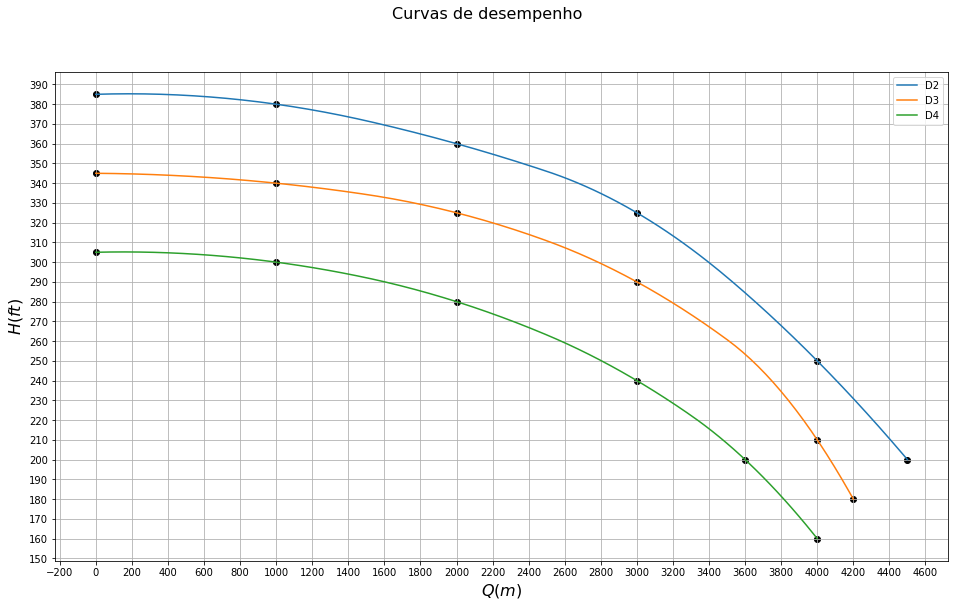